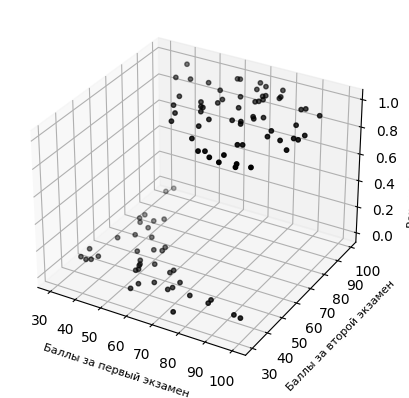

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.1 визуализация данных

path = 'ex2data1.txt'
df = pd.read_csv(path, header=None,
                 names=['Баллы за первый экзамен', 'Баллы за второй экзамен', 'Решение о зачислении'])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['Баллы за первый экзамен'], df['Баллы за второй экзамен'], df['Решение о зачислении'], c='black', s=10)
ax.set_xlabel('Баллы за первый экзамен', fontsize=8)
ax.set_ylabel('Баллы за второй экзамен', fontsize=8)
ax.set_zlabel('Решение о зачислении', fontsize=8)

plt.show()

In [ ]:
# 1.1* нормализация данных

a1 = df['Баллы за первый экзамен'].sum() / df['Баллы за первый экзамен'].count()
a2 = df['Баллы за второй экзамен'].sum() / df['Баллы за второй экзамен'].count()

σ1 = np.sqrt(((df['Баллы за первый экзамен'] - a1) ** 2).sum() / df['Баллы за первый экзамен'].count())
σ2 = np.sqrt(((df['Баллы за второй экзамен'] - a2) ** 2).sum() / df['Баллы за второй экзамен'].count())


df['Баллы за первый экзамен'] = (df['Баллы за первый экзамен'] - a1) / σ1
df['Баллы за второй экзамен'] = (df['Баллы за второй экзамен'] - a2) / σ2

In [ ]:
# 1.2 реализация функции потерь

# задание матрицы X0 (первый столбец содержит единицы, второй и третий - признаки)
X0 = np.ones((df['Баллы за первый экзамен'].size, 3))
X0[:, 1] = df['Баллы за первый экзамен'].values
X0[:, 2] = df['Баллы за второй экзамен'].values

# задание вектора параметров (начальные значения параметров выбираем нулевыми)
θ = np.array([0, 0, 0]).T

# вектор выходных данных
y = df['Решение о зачислении']

# объем выборки
m = y.size


# задание гипотезы


def g(z):
    return 1 / (1 + np.exp(-z))


def h_θ(θ, X0):
    return g(np.dot(X0, θ))


# функция потерь


def L(θ):
    return - np.sum(y * np.log(h_θ(θ, X0)) + (1 - y) * np.log(1 - h_θ(θ, X0))) / m

In [ ]:
# 1.3 реализация градиентного спуска

# задание скорости обучения
α = 0.1

# задание числа итераций
iterations_num = 5000


# градиентный спуск


def grad(θ):
    loss = []

    for i in range(iterations_num):
        loss.append(L(θ))
        θ = θ - (α / m) * np.dot((h_θ(θ, X0) - y).T, X0).T

    return θ, loss


θ_updated, loss = grad(θ)

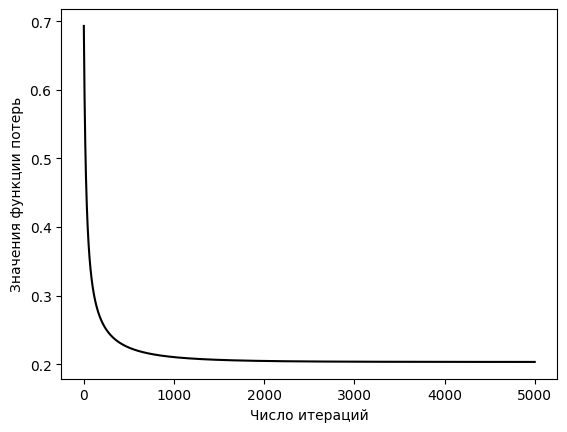

In [ ]:
# 1.4 проверка сходимости алгоритма обучения

plt.plot(loss, c='black')
plt.xlabel('Число итераций')
plt.ylabel('Значения функции потерь')
plt.show()

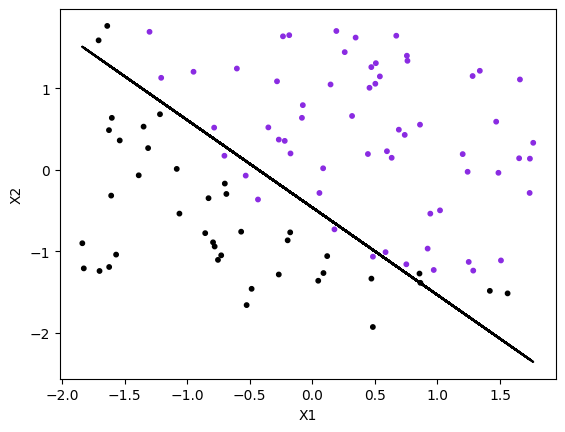

In [ ]:
# 1.5 построение границы принятия решения
plt.plot(X0[:, 1], - (θ_updated[0] + X0[:, 1] * θ_updated[1]) / θ_updated[2], c='black')

colors = ['black', 'blueviolet']
plt.scatter(df['Баллы за первый экзамен'], df['Баллы за второй экзамен'], c=[colors[i] for i in y.squeeze()], s=10)

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# 1.6 предсказание того, с какой вероятностью поступит абитуриент,
# набравший 45 баллов по первому экзамену и 85 баллов по второму

print('С помощью алгоритма градиентного спуска:')
print('')
print('параметры: ', θ_updated)
print('вероятность:')
print(h_θ(θ_updated, np.array((1, (45 - a1) / σ1, (85 - a2) / σ2))))
print('')

С помощью алгоритма градиентного спуска:

параметры:  [1.68550972 3.92250813 3.65713253]
вероятность:
0.7715552940993967



In [ ]:
# 1.7 подсчет точности классификации на обучающей выборке:
# точность = (количество правильно классифицированных примеров) / (размер обучающей выборки)

y_pred = np.round(h_θ(θ_updated, X0))
num_correct = np.sum(y_pred == y)

accuracy = num_correct / m
print('точность: ', accuracy)

точность:  0.89
